In [133]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [134]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [135]:
l12 = 1;
l23 = 2.93;
l2 = 2.71;
l3 = 1.643;
l4 = 2.07;
l5 = 1.789;
l6 = 5.445;

In [136]:
#t1 from 0.24 to 0.95

In [137]:
t1 = 0.66  # have t1 (w.r.t. ground) as our input... in reality, input is cam, but for now use t1
print('input angle is ' + str(round(np.rad2deg(t1),3)))

def equations(x):
    t2, t3, t4, t5 = x
    e1x = l6 - l23 * np.cos(t1) + l4 * np.cos(t4) - l3 * np.cos(t3) + l5 * np.cos(t5)
    e1y = -l23 * np.sin(t1) + l4 * np.sin(t4) - l3 * np.sin(t3) + l5 * np.sin(t5)
    e2x = l3 * np.cos(t3) - l4 * np.cos(t4) - l12 * np.cos(t1) + l2 * np.cos(t2)
    e2y = l3 * np.sin(t3) - l4 * np.sin(t4) - l12 * np.sin(t1) + l2 * np.sin(t2)
    return [e1x, e1y, e2x, e2y]

# Initial guess
t2_guess = np.rad2deg(3.352) * (np.pi/180)
t3_guess = np.rad2deg(np.pi+0.267) * (np.pi/180)
t4_guess = np.rad2deg(3.32) * (np.pi/180)
t5_guess = np.rad2deg(0.961) * (np.pi/180)
initial_guess = [t2_guess, t3_guess, t4_guess, t5_guess]

# Solving the system of equations
solution = fsolve(equations, initial_guess)

t2 = solution[0]%(2*np.pi)
t3 = solution[1]%(2*np.pi)
t4 = solution[2]%(2*np.pi)
t5 = solution[3]%(2*np.pi)

print()
print("Solution:")
print("t1 =", (t1))
print("t2 =", (t2))
print("t3 =", (t3))
print("t4 =", (t4))
print("t5 =", (t5))
print()
print("Solution:")
print("t1 =", np.rad2deg(t1))
print("t2 =", np.rad2deg(t2))
print("t3 =", np.rad2deg(t3))
print("t4 =", np.rad2deg(t4))
print("t5 =", np.rad2deg(t5))

input angle is 37.815

Solution:
t1 = 0.66
t2 = 2.9014592842117515
t3 = 0.4406497663523794
t4 = 2.7800514355853068
t5 = 1.406894414573567

Solution:
t1 = 37.81521447863433
t2 = 166.24137141438217
t3 = 25.24737185541717
t4 = 159.28521408832373
t5 = 80.60911217559412


In [138]:
# Given angle inputs from motion gen
t1 = np.linspace(0.24,0.95,500)

t2=[]
t3=[]
t4=[]
t5=[]

for i in t1:
    def equations(x):
        t2, t3, t4, t5 = x
        e1x = l6 - l23 * np.cos(i) + l4 * np.cos(t4) - l3 * np.cos(t3) + l5 * np.cos(t5)
        e1y = -l23 * np.sin(i) + l4 * np.sin(t4) - l3 * np.sin(t3) + l5 * np.sin(t5)
        e2x = l3 * np.cos(t3) - l4 * np.cos(t4) - l12 * np.cos(i) + l2 * np.cos(t2)
        e2y = l3 * np.sin(t3) - l4 * np.sin(t4) - l12 * np.sin(i) + l2 * np.sin(t2)
        return [e1x, e1y, e2x, e2y]

    # Initial guess
    t2_guess = (3.352 + 2.360) / 2
    t3_guess = (0.267 + 0.446) / 2
    t4_guess = (3.320 + 2.086) / 2
    t5_guess = (0.961 + 2.346) / 2
    initial_guess = [t2_guess, t3_guess, t4_guess, t5_guess]

    # Solving the system of equations
    solution = fsolve(equations, initial_guess)
    t2.append(solution[0]%(2 * np.pi))
    t3.append(solution[1]%(2 * np.pi))
    t4.append(solution[2]%(2 * np.pi))
    t5.append(solution[3]%(2 * np.pi))

In [139]:
t1 = np.rad2deg(t1)
t2 = np.rad2deg(t2)
t3 = np.rad2deg(t3)
t4 = np.rad2deg(t4)
t5 = np.rad2deg(t5)

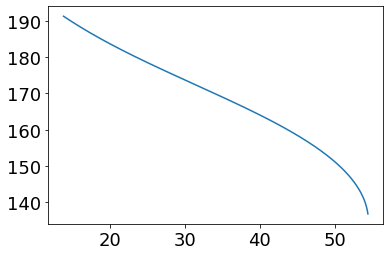

In [140]:
plt.plot(t1,t2)

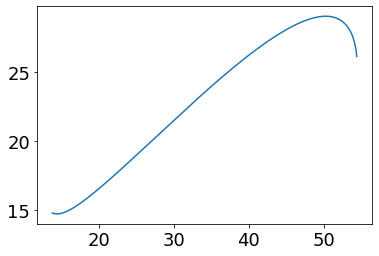

In [141]:
plt.plot(t1,t3)

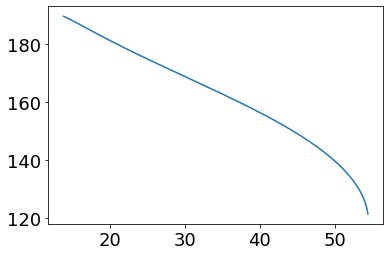

In [142]:
plt.plot(t1,t4)

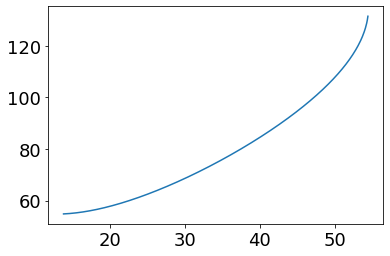

In [143]:
plt.plot(t1,t5)

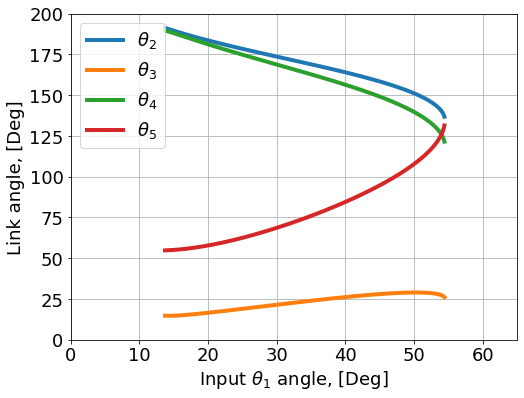

In [144]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8, 6))
plt.plot(t1,t2,label='$θ_2$',linewidth=4)
plt.plot(t1,t3,label='$θ_3$',linewidth=4)
plt.plot(t1,t4,label='$θ_4$',linewidth=4)
plt.plot(t1,t5,label='$θ_5$',linewidth=4)
plt.xlabel('Input $θ_1$ angle, [Deg]')
plt.ylabel('Link angle, [Deg]')
plt.ylim([0,200])
plt.xlim([0,65])
plt.grid(True)
plt.legend()
plt.show()

In [145]:
t1 = np.deg2rad(t1)
t2 = np.deg2rad(t2)
t3 = np.deg2rad(t3)
t4 = np.deg2rad(t4)
t5 = np.deg2rad(t5)

In [146]:
def get_points(t1,t2,t3,t4,t5):
    [Ax,Ay] = [0, 0]
    [Bx,By] = [l6, 0]
    [Cx,Cy] = [Bx - l23*np.cos(t1), -l23*np.sin(t1)]
    [Dx,Dy] = [Cx - l12*np.cos(t1), Cy - l12*np.sin(t1)]
    [Ex,Ey] = [Dx + l2*np.cos(t2), Dy + l2*np.sin(t2)]
    [Fx,Fy] = [Cx + l4*np.cos(t4), Cy + l4*np.sin(t4)]
    [Gx,Gy] = [Dx - l23*np.cos(t1) , Dy - l23*np.sin(t1)]
    
    return([Ax,Ay,Bx,By,Cx,Cy,Dx,Dy,Ex,Ey,Fx,Fy,Gx,Gy])

In [147]:
test = 80
[Ax,Ay,Bx,By,Cx,Cy,Dx,Dy,Ex,Ey,Fx,Fy,Gx,Gy] = get_points(t1[test],t2[test],t3[test],t4[test],t5[test])

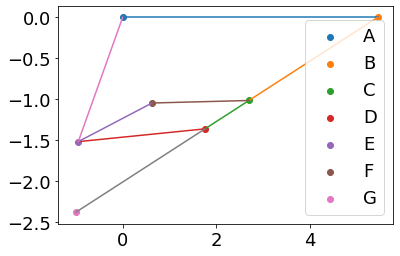

In [148]:
plt.scatter(Ax,Ay,label='A')
plt.scatter(Bx,By,label='B')
plt.scatter(Cx,Cy,label='C')
plt.scatter(Dx,Dy,label='D')
plt.scatter(Ex,Ey,label='E')
plt.scatter(Fx,Fy,label='F')
plt.scatter(Gx,Gy,label='G')

plt.plot([Ax,Bx],[Ay,By])
plt.plot([Bx,Cx],[By,Cy])
plt.plot([Cx,Dx],[Cy,Dy])
plt.plot([Dx,Ex],[Dy,Ey])
plt.plot([Ex,Fx],[Ey,Fy])
plt.plot([Fx,Cx],[Fy,Cy])
plt.plot([Ex,Ax],[Ey,Ay])
plt.plot([Gx,Dx],[Gy,Dy])

plt.legend()
plt.show()

-6.267714749171149e-10
0.0
-1.1298191705254179e-11
0.0


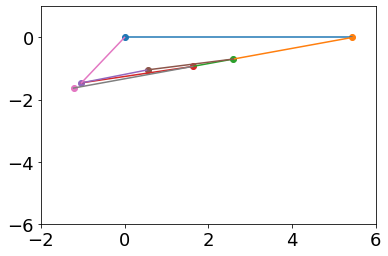

3.487648031377444e-10
-1.638705571402445e-16
-1.6884174453499047e-11
0.0


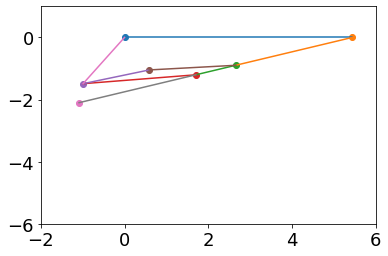

1.5688959354694568e-11
0.0
-4.1789794726060974e-12
0.0


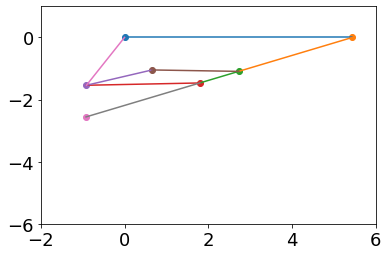

2.524406371785446e-10
0.0
-1.155048194778251e-10
0.0


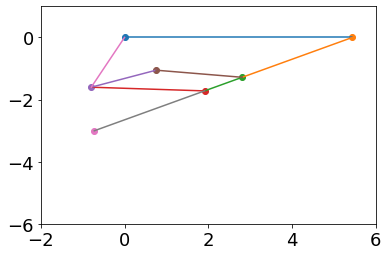

6.524065183498796e-12
0.0
-1.2260700333541504e-11
2.145358501691124e-16


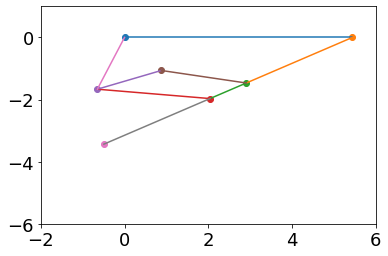

-2.981280833034797e-12
0.0
-2.8001135595634257e-11
0.0


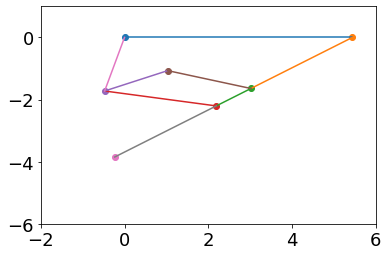

-3.2938560890678874e-11
-1.638705571402445e-16
1.5767464428851738e-11
0.0


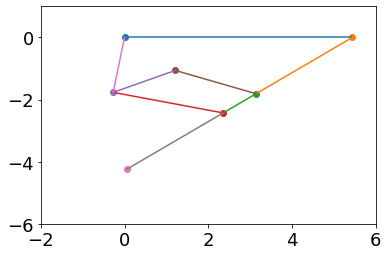

-1.8973208818596892e-11
-1.638705571402445e-16
8.991117176541332e-12
0.0


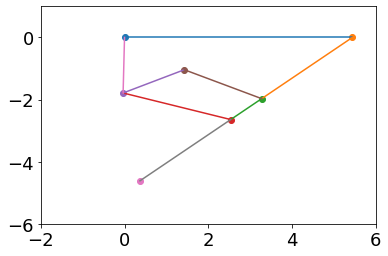

-4.3150006268541987e-11
0.0
-1.4444386715999602e-12
0.0


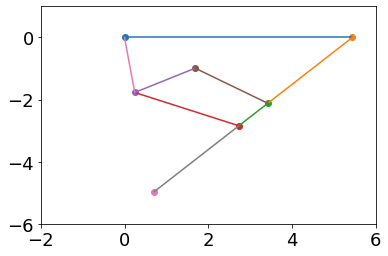

-4.284008710783891e-11
0.0
6.073751091577445e-11
0.0


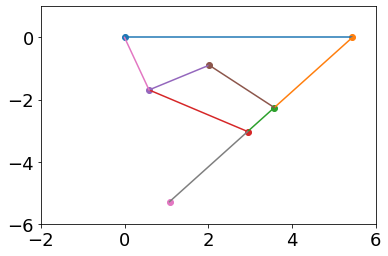

In [149]:
for i in range(len(t1)):
    if i%50 == 0:
        [Ax,Ay,Bx,By,Cx,Cy,Dx,Dy,Ex,Ey,Fx,Fy,Gx,Gy] = get_points(t1[i],t2[i],t3[i],t4[i],t5[i])
        
        l5_check = np.sqrt( (Ax-Ex)**2 + (Ay-Ey)**2 )
        l2_check = np.sqrt( (Dx-Ex)**2 + (Dy-Ey)**2 )
        l3_check = np.sqrt( (Fx-Ex)**2 + (Fy-Ey)**2 )
        l4_check = np.sqrt( (Cx-Fx)**2 + (Cy-Fy)**2 )
        
        print( (l5_check - l5) / l5 )
        print( (l2_check - l2) / l2 )
        print( (l3_check - l3) / l3 )
        print( (l4_check - l4) / l4 )
        
        plt.scatter(Ax,Ay,label='A')
        plt.scatter(Bx,By,label='B')
        plt.scatter(Cx,Cy,label='C')
        plt.scatter(Dx,Dy,label='D')
        plt.scatter(Ex,Ey,label='E')
        plt.scatter(Fx,Fy,label='F')
        plt.scatter(Gx,Gy,label='G')

        plt.plot([Ax,Bx],[Ay,By])
        plt.plot([Bx,Cx],[By,Cy])
        plt.plot([Cx,Dx],[Cy,Dy])
        plt.plot([Dx,Ex],[Dy,Ey])
        plt.plot([Ex,Fx],[Ey,Fy])
        plt.plot([Fx,Cx],[Fy,Cy])
        plt.plot([Ex,Ax],[Ey,Ay])
        plt.plot([Gx,Dx],[Gy,Dy])
        
        plt.xlim([-2,6])
        plt.ylim([-6,1])
        plt.show()